In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from itertools import cycle
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestClassifier

from datetime import datetime


In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_whole = pd.concat([df_train, df_test], axis = 0, ignore_index=True)

df_target = df_train["label"]
df_train = df_train.drop("label", axis = 1)

print(df_train.head())
print(df_whole.head())
print(df_whole.isnull().sum().sum())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [6]:
print(df_whole.describe)
df_clean = df_whole.dropna()
print(df_clean.describe)
df_test_length = range(1,len(df_test)+1)

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0        1.0       0       0       0       0       0       0       0       0   
1        0.0       0       0       0       0       0       0       0       0   
2        1.0       0       0       0       0       0       0       0       0   
3        4.0       0       0       0       0       0       0       0       0   
4        0.0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995    NaN       0       0       0       0       0       0       0       0   
69996    NaN       0       0       0       0       0       0       0       0   
69997    NaN       0       0       0       0       0       0       0       0   
69998    NaN       0       0       0       0       0       0       0       0   
69999    NaN       0       0       0       0       0       0       0       0   

     

In [9]:
def fitWithTimeOutput(clf, trainX, trainY):
    start = datetime.now()

    clf.fit(trainX, trainY)
    end=datetime.now()
    return end-start

In [10]:
np.std([0,1])

0.5

In [11]:
print(df_whole.describe())

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  70000.0  70000.0  70000.0  ...  70000.000000  70000.000000   
mean       0.0      0.0      0.0  ...      0.197414      0.099543   
std        0.0      0.0      0.0  ...      5.991206      4.256304   
min        0.0      0.0      0

No data cleaning necessary, no data is missing

## Random Forest & PCA research

In [12]:
n_estimators_array = np.array([1,5,10,50,100,200,500])

n_grid = len(n_estimators_array)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(10)
    for i in range(0, 10):
        trainX, testX, trainY, testY = \
        train_test_split(df_train.iloc[0:2000], 
        df_target.iloc[0:2000], 
                                    train_size = 0.8, random_state=0)
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, 
                                     criterion="gini")
        print(fitWithTimeOutput(clf, trainX, trainY))
    j=j+1


0:00:00.050102
0:00:00.017167
0:00:00.019371
0:00:00.017201
0:00:00.061572
0:00:00.018948
0:00:00.016589
0:00:00.016747
0:00:00.025627
0:00:00.016834
0:00:00.126242
0:00:00.054652
0:00:00.071888
0:00:00.112534
0:00:00.063212
0:00:00.061244
0:00:00.092430
0:00:00.085357
0:00:00.101846
0:00:00.057823
0:00:00.177371
0:00:00.110317
0:00:00.141381
0:00:00.112461
0:00:00.140655
0:00:00.140631
0:00:00.184473
0:00:00.086902
0:00:00.112187
0:00:00.095523
0:00:00.491359
0:00:00.607047
0:00:00.578223
0:00:00.513759
0:00:00.550469
0:00:00.500573
0:00:00.467351
0:00:00.564527
0:00:00.436469
0:00:00.497874
0:00:00.941868
0:00:01.078708
0:00:01.104812
0:00:01.041795
0:00:00.998869
0:00:00.887474
0:00:01.079190
0:00:00.970997
0:00:01.055843
0:00:00.868210
0:00:02.146773
0:00:02.540620
0:00:01.940843
0:00:01.793001
0:00:01.782217
0:00:01.737667
0:00:02.003767
0:00:01.851571
0:00:02.113443
0:00:02.020031
0:00:04.829659
0:00:04.734017
0:00:05.300705
0:00:06.297856
0:00:06.595290
0:00:07.647076
0:00:05.49

ranges from 1 - 3 seconds of computation time thanks to only looking at few of the values (only 1000)

## PCA

In [14]:
array_components = ([1, 2, 3, 4, 5, 10, 20, 50, 100, 150, 200, 300, 500])
variance_ratio = np.zeros(len(array_components))
count = 0;
for n_components in array_components:
    pca = PCA(n_components = n_components)
    start = datetime.now()
    pca.fit(df_train)
    end = datetime.now()
    print(end-start)
    variance_ratio[count] = sum(pca.explained_variance_ratio_)
    count = count + 1    

0:00:03.417165
0:00:02.681120
0:00:02.870680
0:00:03.089797
0:00:02.797669
0:00:04.503741
0:00:05.316087
0:00:04.833827
0:00:06.390714
0:00:08.916995
0:00:08.637847
0:00:13.788414
0:00:25.785511


We can see as the number of components increase, the time it takes to compute the PCA increases dramatically. The peak is seen with 500 components with about 19 seconds. 

Text(0, 0.5, 'Variability')

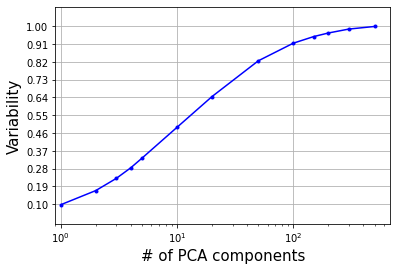

In [15]:

plt.plot(array_components,variance_ratio,'b.-')
plt.xscale("log")
plt.ylim(0,1.1)
plt.yticks(np.linspace(0.1,1.0,11))
plt.xlim(0.9)
plt.grid()
plt.xlabel("# of PCA components",size = 15)
plt.ylabel("Variability",size = 15)

Looks like over 100 components get about 95% variability

## Random Forest Control

In [16]:
clf = RandomForestClassifier()
start = datetime.now()

print(fitWithTimeOutput(clf, df_train, df_target))

results=clf.predict(df_test)

np.savetxt('random_forest.csv', np.c_[df_test_length,results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')



0:00:35.494905


To note that it took about 35 seconds for the random forest control to run

## Random Forest PCA

In [17]:
df_train_alt = pd.read_csv('train.csv')
df_test_alt = pd.read_csv('test.csv')

df_x = df_train_alt.iloc[:,1:]
df_y = df_train_alt.iloc[:,0]

In [18]:
# creating another set of training and test splits based on the above dfs
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(df_x, 
                                df_y, test_size=0.2, random_state=0)
print(X_train_alt.shape)
print(X_test_alt.shape)

(33600, 784)
(8400, 784)


In [19]:
# combining the test and training sets to conduct PCA
print(df_x.shape) 
print(df_test_alt.shape)

combined = pd.concat([df_x, df_test_alt])
combined.shape

(42000, 784)
(28000, 784)


(70000, 784)

## PCA Research

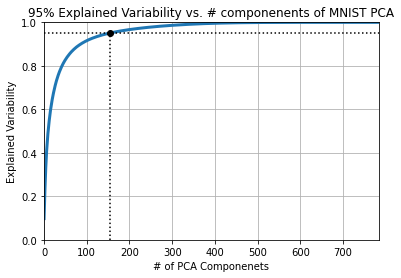

In [43]:
pca = PCA()
pca.fit(combined)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.plot(cumsum, linewidth = 3)
plt.axis([0,784,0,1])
plt.xlabel("# of PCA Componenets")
plt.ylabel("Explained Variability")
plt.plot([0,784],[0.95,0.95],"k:")
plt.plot([d,d],[0,0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.title("95% Explained Variability vs. # componenents of MNIST PCA")
plt.show()

## Random Forest Based on PCA Results with Combined Dataset

In [42]:
pca = PCA(n_components = 154)
pca.fit(combined)
X_train_reduced = pca.fit_transform(X_train_alt)
X_test_reduced = pca.fit_transform(df_test_alt)

clf = RandomForestClassifier(n_estimators=100)
print(fitWithTimeOutput(clf, X_train_reduced, y_train_alt))

0:00:53.583033


In [22]:
pred = clf.predict(X_test_reduced)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),
                                  name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_pca_rf_alt.csv",index=False)

## K-means Clustering

In [27]:
path = 'mnist.npz'

#with np.load(path, allow_pickle=True) as f:
#    x_train, y_train = f['x_train'], f['y_train']
#    x_test, y_test = f['x_test'], f['y_test']

import sys; import pickle; import gzip;
f = gzip.open('mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data

X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(X.shape)
#print(x_train)


(60000, 784)
(784,)
(60000, 784)


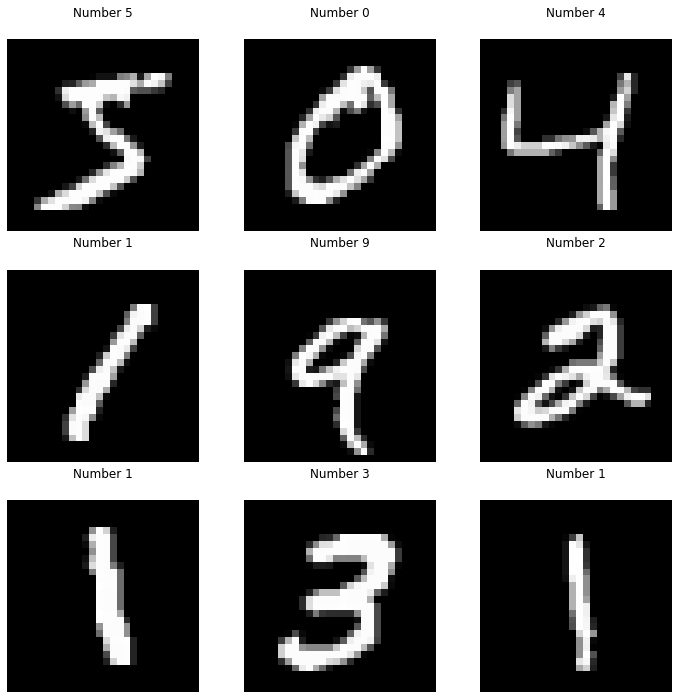

In [28]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure


In [29]:


X = x_train.reshape(len(x_train),-1)
Y = y_train

from sklearn.cluster import MiniBatchKMeans
X = X.astype(float) / 255.

n_digits = len(np.unique(y_test))
print(n_digits)
# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)
# Fit the model to the training data
kmeans.fit(X)
kmeans.labels_

10


array([6, 3, 1, ..., 6, 5, 7], dtype=int32)

In [30]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
     
        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
         
    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[3 0 4 1 9 2 1 2 1 7 3 1 3 6 1 7 2 2 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [31]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [32]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))


Number of Clusters: 10
Inertia: 2369080.5343655273
Homogeneity: 0.4616288894189887
Accuracy: 0.5606

Number of Clusters: 16
Inertia: 2206353.598882834
Homogeneity: 0.5669503194277623
Accuracy: 0.6424666666666666

Number of Clusters: 36
Inertia: 1954912.105389294
Homogeneity: 0.6962834954433142
Accuracy: 0.7888

Number of Clusters: 64
Inertia: 1808715.0219983798
Homogeneity: 0.7379987475232668
Accuracy: 0.8116166666666667

Number of Clusters: 144
Inertia: 1622146.995457646
Homogeneity: 0.8043910426811767
Accuracy: 0.8634833333333334

Number of Clusters: 256
Inertia: 1506267.9804752502
Homogeneity: 0.8404523099590957
Accuracy: 0.8907666666666667



In [33]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(df_train)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


Accuracy: 0.9012



In [35]:
np.savetxt('knn_pca_results.csv', 
           np.c_[df_test_length, test_clusters], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

## PCA Fixed the Flaw

In [38]:
# https://stats.stackexchange.com/questions/47457/
# pca-on-high-dimensional-text-data-before-random-forest-classification


pca = PCA(n_components=0.95)
pca.fit(df_train)
train_PCA = pca.transform(df_train)
test_PCA = pca.transform(df_test)

start = datetime.now()
clf = RandomForestClassifier()
clf.fit(train_PCA, df_target)
end=datetime.now()
print(end-start)
results=clf.predict(test_PCA)

pca.n_components_

0:01:20.751405


154

In [39]:
np.savetxt('random_forest_pca_fix.csv', np.c_[df_test_length, results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

Number of principle components is 154! And it took a little less time to complete the PCA in comparison to the whole dataset. 